# Initialisation

## Configuration hardware

In [1]:
import cpuinfo
cpuinfo.get_cpu_info()['count']

12

In [2]:
cpuinfo.get_cpu_info()['brand_raw']

'Intel(R) Xeon(R) CPU @ 2.20GHz'

In [3]:
import psutil
import platform

In [4]:
print("Physical cores:", psutil.cpu_count(logical=False))
print("Total cores:", psutil.cpu_count(logical=True))

Physical cores: 6
Total cores: 12


## Installations

In [5]:
pip install -q dagshub mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.0/261.0 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 89.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 88.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 733.8/733.8 kB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [6]:
pip install mlflow==2.22

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 72.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 115.9 MB/s eta 0:00:00
  Attempting uninstall: mlflow-skinny
    Found existing installation: mlflow-skinny 3.1.1
    Uninstalling mlflow-skinny-3.1.1:
      Successfully uninstalled mlflow-skinny-3.1.1
  Attempting uninstall: mlflow
    Found existing installation: mlflow 3.1.1
    Uninstalling mlflow-3.1.1:
      Successfully uninstalled mlflow-3.1.1


## Librairies

In [7]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

In [10]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics

In [11]:
from sklearn.metrics import make_scorer

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

In [14]:
import mlflow

## Configuration Dagshub

In [15]:
import dagshub
dagshub.auth.add_app_token('7ff59a8ec595a39c81790087b5fe632c13a71e8c')
dagshub.init(repo_owner='jonathan.durand25', repo_name='OC_P7', mlflow=True)

Accessing as jonathan.durand25

Initialized MLflow to track repo "jonathan.durand25/OC_P7"

Repository jonathan.durand25/OC_P7 initialized!

# Lecture des données

## Lecture des fichiers

In [16]:
path = '/content/drive/My Drive/colab_datas/OC/P7/'

In [171]:
print(os.listdir(path))

['HomeCredit_columns_description.csv', 'credit_card_balance.csv', 'bureau_balance.csv', 'POS_CASH_balance.csv', 'application_test.csv', 'bureau.csv', 'installments_payments.csv', 'sample_submission.csv', 'previous_application.csv', 'application_train.csv']


In [18]:
app_train = pd.read_csv(path+'application_train.csv')
print('Training data shape: ', app_train.shape)

Training data shape:  (307511, 122)


In [19]:
app_test = pd.read_csv(path+'application_test.csv')
print('Testing data shape: ', app_test.shape)

Testing data shape:  (48744, 121)


## Visualisation des tables application

In [20]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Pré traitement des données

## Répartition de la cible

In [22]:
app_train['TARGET'].value_counts()/len(app_train)

,count
TARGET,
0,0.919271
1,0.080729


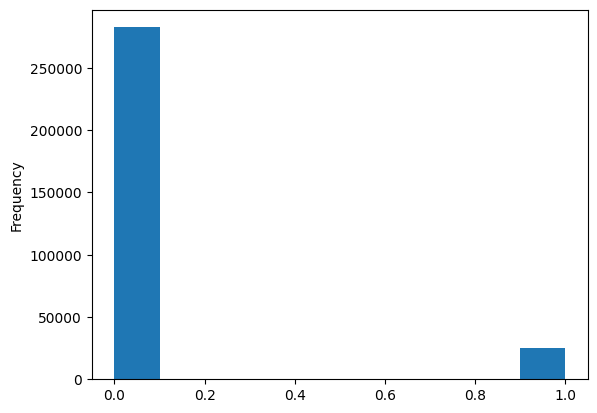

In [23]:
app_train['TARGET'].astype(int).plot.hist();

## Taux de remplissage des colonnes

In [24]:
sum(app_train.isnull().sum()==0)

55

In [25]:
full_table = pd.DataFrame(app_train.isnull().sum()==0, columns=['full'])
full_table.loc[full_table['full']]

,full
SK_ID_CURR,True
TARGET,True
NAME_CONTRACT_TYPE,True
CODE_GENDER,True
FLAG_OWN_CAR,True
FLAG_OWN_REALTY,True
CNT_CHILDREN,True
AMT_INCOME_TOTAL,True
AMT_CREDIT,True
NAME_INCOME_TYPE,True


In [26]:
# Function to calculate missing values by column# Funct
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        features_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        features_table_ren_columns = features_table.rename(
        columns = {0 : 'Missing Values', 1 : '% miss of Total Values'})

        # Sort the table by index
        features_table_ren_columns = features_table_ren_columns.sort_index().round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(features_table_ren_columns.loc[
                features_table_ren_columns['% miss of Total Values']!=0].shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return features_table_ren_columns

In [27]:
# Missing values statistics
features_df = missing_values_table(app_train)

Your selected dataframe has 122 columns.
There are 64 columns that have missing values.


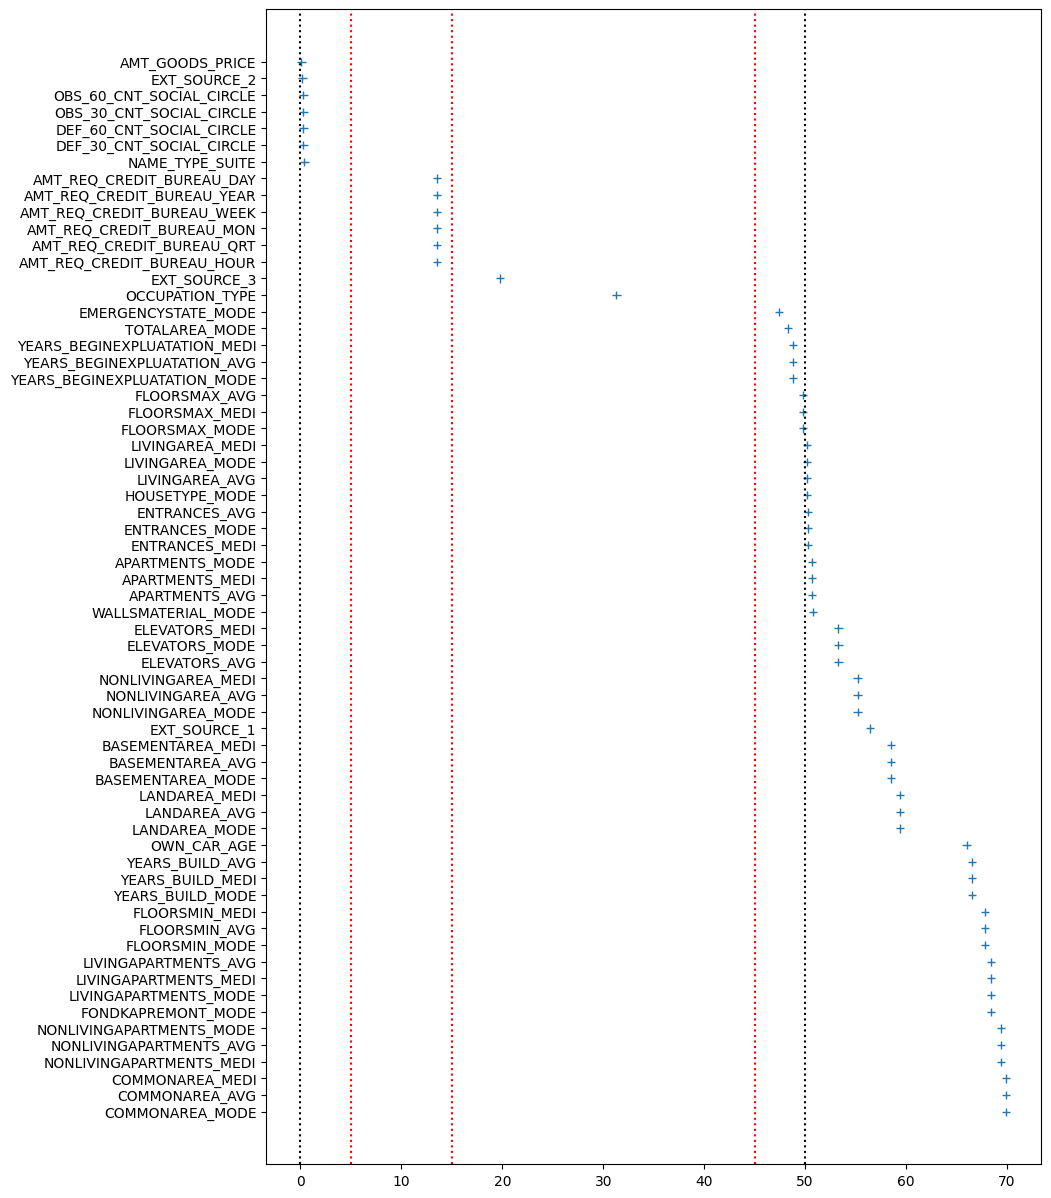

In [28]:
data_plot = features_df.loc[
    features_df['% miss of Total Values']!=0].sort_values(
        '% miss of Total Values', ascending=False).round(1)

plt.figure(figsize = (10, 15))

plt.scatter(x=data_plot['% miss of Total Values'], y=data_plot.index, marker='+', ls='')

plt.axvline(0, c='k', ls=':')
plt.axvline(5, c='r', ls=':')
plt.axvline(15, c='r', ls=':')
plt.axvline(45, c='r', ls=':')
plt.axvline(50, c='k', ls=':')

plt.show()

## Types et encodage

In [29]:
app_train.dtypes.value_counts()

,count
float64,65
int64,41
object,16


In [30]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

,0
NAME_CONTRACT_TYPE,2
CODE_GENDER,3
FLAG_OWN_CAR,2
FLAG_OWN_REALTY,2
NAME_TYPE_SUITE,7
NAME_INCOME_TYPE,8
NAME_EDUCATION_TYPE,5
NAME_FAMILY_STATUS,6
NAME_HOUSING_TYPE,6
OCCUPATION_TYPE,18


In [31]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])

            # Keep track of how many columns were label encoded
            le_count += 1

print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


3 colonnes et pas 4 car "EMERGENCYSTATE_MODE" comporte la valeur "No" et des NaN

In [32]:
features_df.shape

(122, 2)

In [33]:
app_train.shape

(307511, 122)

In [34]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


In [35]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


In [36]:
features_df = missing_values_table(app_train)

Your selected dataframe has 240 columns.
There are 58 columns that have missing values.


In [37]:
features_df.shape

(240, 2)

## Traitement particulier de certaines colonnes

### Age

In [38]:
(app_train['DAYS_BIRTH'] / -365).describe()

,DAYS_BIRTH
count,307511.000000
mean,43.936973
std,11.956133
min,20.517808
25%,34.008219
50%,43.150685
75%,53.923288
max,69.120548


In [39]:
app_train['BIRTH_YEARS'] = app_train['DAYS_BIRTH'] / -365
app_train = app_train.drop('DAYS_BIRTH', axis=1)

In [40]:
features_df.loc['BIRTH_YEARS'] = features_df.loc['DAYS_BIRTH']
features_df = features_df.drop('DAYS_BIRTH')
features_df = features_df.sort_index()

### Temps d'emploi

In [41]:
app_train['DAYS_EMPLOYED'].describe()

,DAYS_EMPLOYED
count,307511.000000
mean,63815.045904
std,141275.766519
min,-17912.000000
25%,-2760.000000
50%,-1213.000000
75%,-289.000000
max,365243.000000


In [42]:
features_df.loc['DAYS_EMPLOYED']

,DAYS_EMPLOYED
Missing Values,0.0
% miss of Total Values,0.0


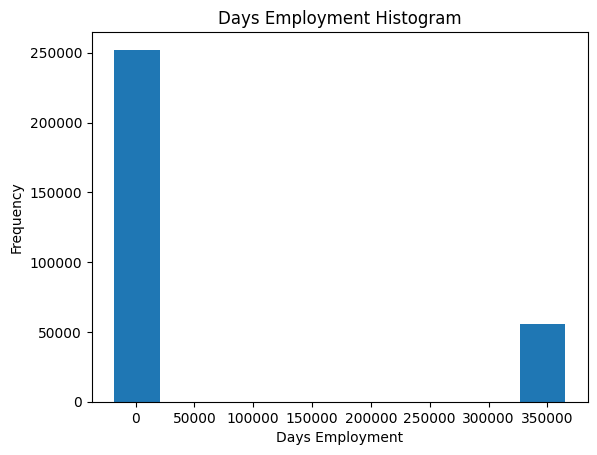

In [43]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [44]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are {} anomalous days of employment ({:0.2f}%)'.format(len(anom), len(anom)/len(app_train)*100))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment (18.01%)


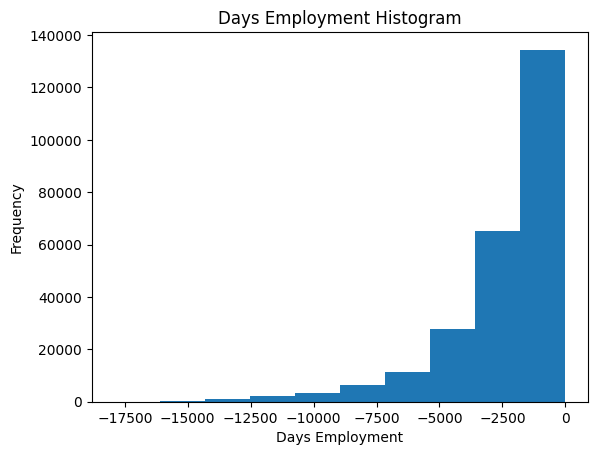

In [45]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');


In [46]:
features_df.loc['DAYS_EMPLOYED_ANOM'] = features_df.loc['DAYS_EMPLOYED']


In [47]:
features_df.loc['DAYS_EMPLOYED'] = [app_train['DAYS_EMPLOYED'].isnull().sum(), (app_train['DAYS_EMPLOYED'].isnull().sum()/len(app_train)*100).round(1)]
features_df = features_df.sort_index()

# Corrélations

In [48]:
corr_matrix =  app_train.corr()

In [49]:
correlations =corr_matrix['TARGET']

In [50]:
features_df['target_correlation'] = correlations.sort_index()

In [51]:
features_df = features_df.drop('TARGET')

In [52]:
idx = np.argsort(np.abs(features_df['target_correlation']))

In [53]:
idx_max = 10

In [54]:
features_df.index[idx[::-1]][0:idx_max]

Index(['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'BIRTH_YEARS',
       'DAYS_EMPLOYED', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
       'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Higher education',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

In [55]:
features_df['top_corr'] = features_df.index.isin(features_df.index[idx[::-1]][0:idx_max])*1

# Autres traitements

In [56]:
app_train['YEARS_CREDIT'] = app_train['AMT_CREDIT']/app_train['AMT_ANNUITY']

In [57]:
app_train['YEARS_CREDIT'].describe()

,YEARS_CREDIT
count,307499.000000
mean,21.612322
std,7.823823
min,8.036674
25%,15.614496
50%,20.000000
75%,27.099985
max,45.305079


In [58]:
app_train['RATIO_DEBT'] = app_train['AMT_ANNUITY']/app_train['AMT_INCOME_TOTAL']

In [59]:
app_train['RATIO_DEBT'].describe()

,RATIO_DEBT
count,307499.000000
mean,0.180930
std,0.094574
min,0.000224
25%,0.114782
50%,0.162833
75%,0.229067
max,1.875965


In [60]:
app_train[['TARGET', 'RATIO_DEBT', 'YEARS_CREDIT']].corr()['TARGET']

,TARGET
TARGET,1.000000
RATIO_DEBT,0.014265
YEARS_CREDIT,-0.032102


(0.0, 1.0)

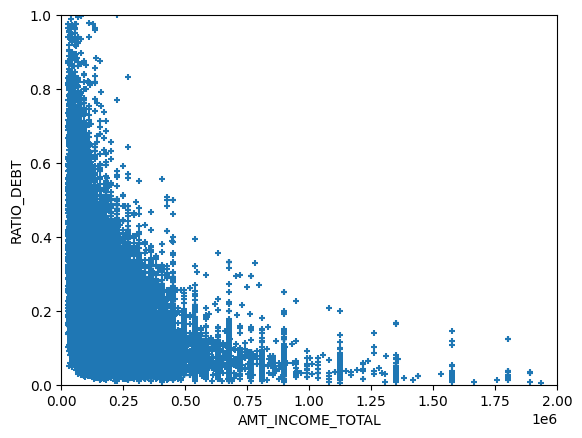

In [61]:
app_train.plot.scatter(x='AMT_INCOME_TOTAL', y='RATIO_DEBT', marker='+')
ax = plt.gca()
ax.set_xlim([0,2e6])
ax.set_ylim([0,1])

# Entraînement

In [62]:
app_train = app_train.drop(columns = ['RATIO_DEBT', 'YEARS_CREDIT'])

## Séparation des données en entraînement et test

In [63]:
model_train, model_test = train_test_split(app_train, test_size = 0.25, stratify=app_train['TARGET'])

## Création de la fonction de score

In [64]:
def calculate_score(estimator, X, y_true):
  # Calcul des probabilités avec l'estimateur
  probas = estimator.predict_proba(X)[:, 1]

  # Calcul des grandeurs ROC
  [fpr, tpr, thr] = metrics.roc_curve(y_true, probas)

  # indice du premier seuil pour lequel
  # la spécificité est inférieure à 0.05
  # (cible de <5% de faux positif)
  idx = np.max(np.where(fpr<0.05))

  # Calcul des résultats avec les probabilités et le seuil
  resultats = (probas>=thr[idx])*1

  # Différence de la prédiction et de la cible
  resultats_diff = resultats-y_true

  # Calcul du score
  # Faux positif = 10
  # Faux négatif = 1
  score_tot = sum((resultats_diff<0)*10 + (resultats_diff>0))

  # score par prédiction
  score_pred = score_tot/X.shape[0]

  return score_pred

In [65]:
my_scorer = make_scorer(calculate_score, greater_is_better=False)

## Données totales

### Normalisation et imputations des données totales

In [66]:
scaler_full_minMax = MinMaxScaler(feature_range = (0, 1))
scaler_full_standard = StandardScaler()

In [67]:
scaler_full_minMax.fit(app_train.drop(columns=['TARGET']));
scaler_full_standard.fit(app_train.drop(columns=['TARGET']));

In [68]:
data_train_full = model_train.drop(columns = ['TARGET'])
features_full = data_train_full.columns

In [69]:
data_train_full_scaledMM = scaler_full_minMax.transform(data_train_full)
data_train_full_scaledS = scaler_full_standard.transform(data_train_full)

In [70]:
imputer_full_med = SimpleImputer(strategy = 'median')

In [71]:
imputer_full_med.fit(data_train_full_scaledMM)
data_train_full_scaledMM_impMed = imputer_full_med.transform(data_train_full_scaledMM)

In [72]:
print('Training data shape: ', data_train_full_scaledMM_impMed.shape)

Training data shape:  (230633, 240)


### Régression logistique

#### Modèle

In [73]:
clf_reglog_full = GridSearchCV(
    LogisticRegression(class_weight='balanced'),
    {"C":[0.01, 0.1, 1, 10]},
    cv=5,
    scoring=calculate_score,
    verbose=1,
    n_jobs=-1
)

In [74]:
clf_reglog_full.fit(data_train_full_scaledMM_impMed, model_train['TARGET'])

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             n_jobs=-1, param_grid={'C': [0.01, 0.1, 1, 10]},
             scoring=<function calculate_score at 0x7d98e8315940>, verbose=1)

#### Résultats

In [75]:
clf_reglog_full.best_score_

np.float64(0.6712569274221682)

In [76]:
clf_reglog_full.best_params_

{'C': 0.01}

#### Composantes les plus importantes

In [77]:
idx = np.argsort(np.abs(clf_reglog_full.best_estimator_.coef_))

In [78]:
features_full[idx[0][::-1]][0:idx_max]

Index(['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_EMPLOYED',
       'AMT_ANNUITY', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_13', 'AMT_GOODS_PRICE', 'DEF_30_CNT_SOCIAL_CIRCLE'],
      dtype='object')

In [79]:
features_df['top_reglog'] = features_df.index.isin(features_full[idx[0][::-1]][0:idx_max])*1

### Random Forest

#### Modèle

In [80]:
clf_RF_full = GridSearchCV(
    RandomForestClassifier(class_weight='balanced', verbose=1, n_jobs=-1, random_state=50),
    {'n_estimators' : [50, 100, 150, 200], 'max_depth':[50, 70, 100]},
    cv=5,
    scoring=my_scorer,
    verbose=1,
    n_jobs=-1
)

In [81]:
clf_RF_full.fit(data_train_full_scaledMM_impMed, model_train['TARGET'])

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.2s finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=50,
                                              verbose=1),
             n_jobs=-1,
             param_grid={'max_depth': [50, 70, 100],
                         'n_estimators': [50, 100, 150, 200]},
             scoring=make_scorer(calculate_score, greater_is_better=False, response_method='predict'),
             verbose=1)

#### Résultats

In [82]:
clf_RF_full.best_score_

np.float64(nan)

#### Composantes les plus importantes

In [83]:
idx = np.argsort(np.abs(clf_RF_full.best_estimator_.feature_importances_))

In [84]:
features_full[idx[::-1]][0:idx_max]

Index(['EXT_SOURCE_2', 'EXT_SOURCE_3', 'BIRTH_YEARS', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'AMT_ANNUITY', 'DAYS_REGISTRATION',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT', 'EXT_SOURCE_1'],
      dtype='object')

In [85]:
features_df['top_RF'] = features_df.index.isin(features_full[idx[::-1]][0:idx_max])*1

### Gradient boosting

#### Modèle

In [86]:
clf_GB_full = GridSearchCV(
    lgb.LGBMClassifier(objective='binary', random_state = 50, verbose = 1, class_weight='balanced', n_jobs=-1),
    {'n_estimators':[50, 60], 'learning_rate':[0.2, 0.5]},
    cv=5,
    scoring=my_scorer,
    verbose=1,
    n_jobs=-1
)

In [87]:
clf_GB_full.fit(data_train_full_scaledMM_impMed, model_train['TARGET'])

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[LightGBM] [Info] Number of positive: 18619, number of negative: 212014
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.332513 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11615
[LightGBM] [Info] Number of data points in the train set: 230633, number of used features: 232
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


GridSearchCV(cv=5,
             estimator=LGBMClassifier(class_weight='balanced', n_jobs=-1,
                                      objective='binary', random_state=50,
                                      verbose=1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.5], 'n_estimators': [50, 60]},
             scoring=make_scorer(calculate_score, greater_is_better=False, response_method='predict'),
             verbose=1)

#### Résultats

In [88]:
clf_GB_full.best_score_

np.float64(nan)

In [89]:
clf_GB_full.best_params_

{'learning_rate': 0.2, 'n_estimators': 50}

#### Composantes les plus importantes

In [90]:
idx = np.argsort(np.abs(clf_GB_full.best_estimator_.feature_importances_))

In [91]:
features_full[idx[::-1]][0:idx_max]

Index(['EXT_SOURCE_1', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'AMT_CREDIT',
       'BIRTH_YEARS', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION'],
      dtype='object')

In [92]:
features_df['top_GB'] = features_df.index.isin(features_full[idx[::-1]][0:idx_max])*1

## Sélection des composantes

### Représentation des composantes les plus importantes

In [93]:
features_df['importance_tot'] = features_df['top_corr'] + features_df['top_reglog'] + features_df['top_RF'] + features_df['top_GB']

In [94]:
features_df['feature'] = features_df.index

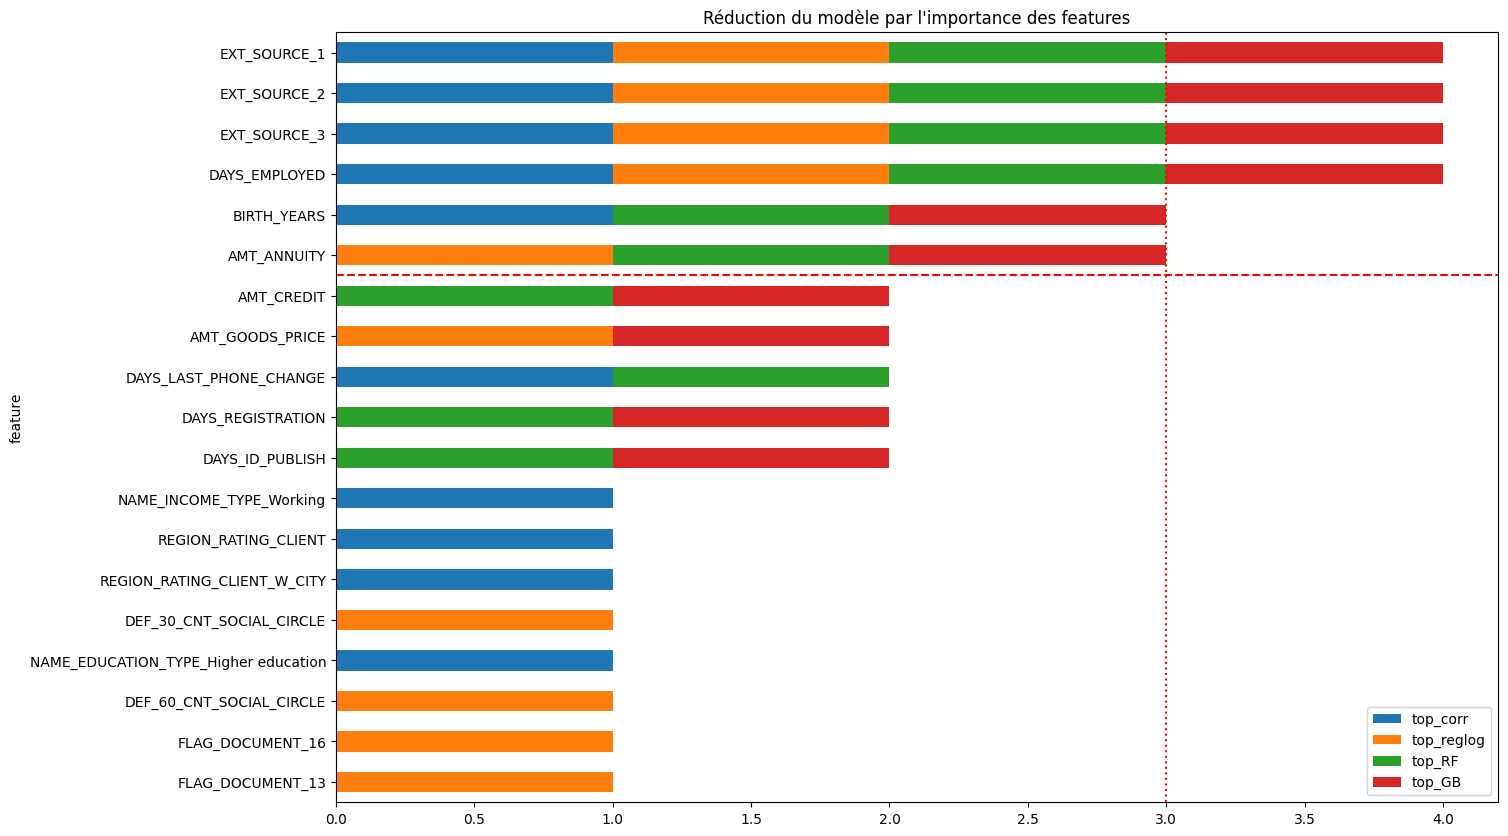

In [95]:
idx = np.argsort(features_df['importance_tot'])[::-1]
idx_max = next(x[0] for x in enumerate(features_df['importance_tot'][idx]) if x[1] < 3)

plt.figure(figsize=(15,10))

ax = plt.subplot(1,1,1)
features_df.loc[
features_df['importance_tot']>0
].sort_values('importance_tot').plot.barh(ax=ax, x='feature', y=['top_corr', 'top_reglog', 'top_RF', 'top_GB'], stacked=True)
ax.axhline(len(features_df.loc[features_df['importance_tot']>0])-idx_max-0.5, linestyle='--', color='r')
ax.axvline(3, linestyle=':', color='r')
plt.title('Réduction du modèle par l\'importance des features')
plt.show()

### Choix des composantes

In [96]:
features_sel = ['EXT_SOURCE_1',
                'EXT_SOURCE_3',
                'EXT_SOURCE_2',
                'AMT_ANNUITY',
                'BIRTH_YEARS',
                'DAYS_EMPLOYED',
                'DAYS_LAST_PHONE_CHANGE']

### Remplissage des composantes

In [97]:
features_df.loc[features_df['feature'].isin(features_sel), '% miss of Total Values']

,% miss of Total Values
AMT_ANNUITY,0.0
BIRTH_YEARS,0.0
DAYS_EMPLOYED,18.0
DAYS_LAST_PHONE_CHANGE,0.0
EXT_SOURCE_1,56.4
EXT_SOURCE_2,0.2
EXT_SOURCE_3,19.8


In [98]:
abs(corr_matrix['EXT_SOURCE_1']).sort_values()

,EXT_SOURCE_1
NAME_TYPE_SUITE_Group of people,0.000037
SK_ID_CURR,0.000082
ORGANIZATION_TYPE_Cleaning,0.000174
FLAG_DOCUMENT_16,0.000186
OCCUPATION_TYPE_IT staff,0.000214
...,...
CODE_GENDER_F,0.306729
CODE_GENDER_M,0.306737
BIRTH_YEARS,0.600610
EXT_SOURCE_1,1.000000


On voit que la composante 'EXT_SOURCE_1' (peu souvent renseignée) est très corrélée avec l'âge (très souvent renseigné).

On ne gardera donc que la composante d'âge

In [99]:
features_sel.remove('EXT_SOURCE_1')

## Composantes sélectionnées

### Sélection des données

In [100]:
app_train_sel = app_train[features_sel+['TARGET']]
model_train_sel = model_train[features_sel+['TARGET']]
model_test_sel = model_test[features_sel+['TARGET']]

### Normalisation

In [101]:
scaler_sel_minMax = MinMaxScaler(feature_range = (0, 1))
scaler_sel_standard = StandardScaler()

In [102]:
scaler_sel_minMax.fit(app_train_sel.drop(columns=['TARGET']));
scaler_sel_standard.fit(app_train_sel.drop(columns=['TARGET']));

In [103]:
data_train_sel = model_train_sel.drop(columns = ['TARGET'])

In [104]:
data_train_sel_scaledMM = scaler_sel_minMax.transform(data_train_sel)
data_train_sel_scaledS = scaler_sel_standard.transform(data_train_sel)

In [105]:
data_train_sel_scaledMM_df = pd.DataFrame(data=data_train_sel_scaledMM, columns=features_sel)

### Imputation médiane

#### Imputation

In [106]:
imputer_sel_med = SimpleImputer(strategy = 'median')

In [107]:
imputer_sel_med.fit(data_train_sel_scaledMM)
data_train_sel_scaledMM_impMed = imputer_sel_med.transform(data_train_sel_scaledMM)

In [108]:
print('Training data shape: ', data_train_sel_scaledMM_impMed.shape)

Training data shape:  (230633, 6)


#### Régression logistique

In [109]:
clf_reglog_sel = GridSearchCV(
    LogisticRegression(class_weight='balanced'),
    {"C":[0.01, 0.1, 1, 10]},
    cv=5,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1
)

In [110]:
clf_reglog_sel.fit(data_train_sel_scaledMM_impMed, model_train_sel['TARGET'])

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             n_jobs=-1, param_grid={'C': [0.01, 0.1, 1, 10]}, scoring='roc_auc',
             verbose=1)

#### Random Forest

In [111]:
clf_RF_sel = GridSearchCV(
    RandomForestClassifier(class_weight='balanced', verbose=1, n_jobs=-1, random_state=50),
    {'n_estimators' : [50, 100, 150, 200], 'max_depth':[50, 70, 100]},
    cv=5,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1
)

In [112]:
clf_RF_sel.fit(data_train_sel_scaledMM_impMed, model_train_sel['TARGET'])

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   17.8s finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=50,
                                              verbose=1),
             n_jobs=-1,
             param_grid={'max_depth': [50, 70, 100],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='roc_auc', verbose=1)

#### Gradient boosting

In [113]:
clf_GB_sel = GridSearchCV(
    lgb.LGBMClassifier(objective='binary', random_state = 50, verbose = 1, class_weight='balanced', n_jobs=-1),
    {'n_estimators':[50, 60], 'learning_rate':[0.2, 0.5]},
    cv=5,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1
)

In [114]:
clf_GB_sel.fit(data_train_sel_scaledMM_impMed, model_train_sel['TARGET'])

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[LightGBM] [Info] Number of positive: 18619, number of negative: 212014
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001694 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1529
[LightGBM] [Info] Number of data points in the train set: 230633, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


GridSearchCV(cv=5,
             estimator=LGBMClassifier(class_weight='balanced', n_jobs=-1,
                                      objective='binary', random_state=50,
                                      verbose=1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.5], 'n_estimators': [50, 60]},
             scoring='roc_auc', verbose=1)

### Imputation KNN

#### Imputation

In [115]:
imputer_sel_KNN = KNNImputer(n_neighbors=3)

In [116]:
imputer_sel_KNN.fit(data_train_sel_scaledMM)
data_train_sel_scaledMM_impKNN = imputer_sel_KNN.transform(data_train_sel_scaledMM)

In [117]:
print('Training data shape: ', data_train_sel_scaledMM_impKNN.shape)

Training data shape:  (230633, 6)


#### Régression logistique

In [118]:
clf_reglog_sel_KNN = GridSearchCV(
    LogisticRegression(class_weight='balanced'),
    {"C":[0.01, 0.1, 1, 10]},
    cv=5,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1
)

In [119]:
clf_reglog_sel_KNN.fit(data_train_sel_scaledMM_impKNN, model_train_sel['TARGET'])

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             n_jobs=-1, param_grid={'C': [0.01, 0.1, 1, 10]}, scoring='roc_auc',
             verbose=1)

#### Random Forest

In [120]:
clf_RF_sel_KNN = GridSearchCV(
    RandomForestClassifier(class_weight='balanced', verbose=1, random_state=50),
    {'n_estimators' : [50, 100, 150, 200], 'max_depth':[50, 70, 100]},
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

In [121]:
clf_RF_sel_KNN.fit(data_train_sel_scaledMM_impKNN, model_train_sel['TARGET'])

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   36.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  2.4min
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  2.4min finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=50, verbose=1),
             n_jobs=-1,
             param_grid={'max_depth': [50, 70, 100],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='roc_auc', verbose=1)

#### Gradient boosting

In [122]:
clf_GB_sel_KNN = GridSearchCV(
    lgb.LGBMClassifier(objective='binary', random_state = 50, verbose = 1, class_weight='balanced', n_jobs=-1),
    {'n_estimators':[50, 60], 'learning_rate':[0.2, 0.5]},
    cv=5,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1
)

In [123]:
clf_GB_sel_KNN.fit(data_train_sel_scaledMM_impKNN, model_train_sel['TARGET'])

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[LightGBM] [Info] Number of positive: 18619, number of negative: 212014
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001403 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1529
[LightGBM] [Info] Number of data points in the train set: 230633, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


GridSearchCV(cv=5,
             estimator=LGBMClassifier(class_weight='balanced', n_jobs=-1,
                                      objective='binary', random_state=50,
                                      verbose=1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.5], 'n_estimators': [50, 60]},
             scoring='roc_auc', verbose=1)

# Test

## Fonctions

In [124]:
def run_mlflow(auc, score, model, name):
  with mlflow.start_run(run_name=name):
    mlflow.log_metric('roc_auc', auc)
    mlflow.log_metric('score', score)
    mlflow.sklearn.log_model(model, name)

In [125]:
def auc_plot(fpr, tpr, thr, idx):
  plt.plot(fpr, tpr, color='coral', lw=2)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('1 - specificite', fontsize=14)
  plt.ylabel('Sensibilite', fontsize=14)
  plt.show()

  print("Sensibilité : {:.2f}".format(tpr[idx]))
  print("Spécificité : {:.2f}".format(1-fpr[idx]))
  print("Seuil : {:.2f}".format(thr[idx]))

In [126]:
def mlflow_plot(name, model, data_test, target):
  auc = roc_auc_score(target, model.predict_proba(data_test)[:, 1])
  print('auc = {}'.format(auc))

  score = calculate_score(model, data_test, target)
  print('score = {}'.format(score))

  run_mlflow(auc, score, model, name)

  #auc_plot(fpr, tpr, thr, idx)

## Imputation sur les données test

In [127]:
model_test.shape

(76878, 241)

In [128]:
mlflow.set_experiment('OC_P7')

<Experiment: artifact_location='mlflow-artifacts:/4044264bd40a4af89052bc4acae19979', creation_time=1749758876112, experiment_id='4', last_update_time=1749758876112, lifecycle_stage='active', name='OC_P7', tags={}>

### Préparation des données

In [129]:
data_test_full = model_test.drop(columns = ['TARGET'])

In [130]:
data_test_full_scaledMM = scaler_full_minMax.transform(data_test_full)

In [131]:
data_test_full_scaledMM_impMed = imputer_full_med.transform(data_test_full_scaledMM)

In [132]:
print('Training data shape: ', data_test_full_scaledMM_impMed.shape)

Training data shape:  (76878, 240)


In [133]:
data_test_full_scaledMM_impMed_df = pd.DataFrame(data=data_test_full_scaledMM_impMed, columns = features_full)

### Enregistrements MLFLOW

#### Données totales

In [134]:
mlflow_plot('reglog_full', clf_reglog_full.best_estimator_, data_test_full_scaledMM_impMed_df, model_test['TARGET'])

auc = 0.7416573054653413
score = 0.6741720648299904


2025/07/03 07:05:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run reglog_full at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/4/runs/dee036afa1144364873bdce2c1aaaee3
🧪 View experiment at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/4


In [135]:
mlflow_plot('RF_full', clf_RF_full.best_estimator_, data_test_full_scaledMM_impMed_df, model_test['TARGET'])

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s


auc = 0.7004639809379151


[Parallel(n_jobs=12)]: Done  50 out of  50 | elapsed:    0.2s finished


score = 0.6826660423007883


2025/07/03 07:05:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RF_full at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/4/runs/e4cb5d23de104465977a0f6c77bcd447
🧪 View experiment at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/4


In [136]:
mlflow_plot('GB_full', clf_GB_full.best_estimator_, data_test_full_scaledMM_impMed_df, model_test['TARGET'])

auc = 0.7519162365128841
score = 0.6533728765056322


2025/07/03 07:06:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GB_full at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/4/runs/c796c2e943874ffb862eb927de7141e0
🧪 View experiment at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/4


#### Composantes sélectionnées

In [137]:
data_test_sel_scaledMM_impMed_df = data_test_full_scaledMM_impMed_df[features_sel]

##### Modèles avec imputation médiane

In [138]:
mlflow_plot('reglog_sel', clf_reglog_sel.best_estimator_, data_test_sel_scaledMM_impMed_df, model_test['TARGET'])

auc = 0.7160442273396425
score = 0.6925258201305965


2025/07/03 07:06:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run reglog_sel at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/4/runs/7b6b6e30aa7c4d6895f8d2f41961fcf6
🧪 View experiment at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/4


In [139]:
mlflow_plot('RF_sel', clf_RF_sel.best_estimator_, data_test_sel_scaledMM_impMed_df, model_test['TARGET'])

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s


auc = 0.694292299335887


[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    0.5s finished


score = 0.7022425141132703


2025/07/03 07:06:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RF_sel at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/4/runs/6b5d9287b7d54cdc8023c9137390729e
🧪 View experiment at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/4


In [140]:
mlflow_plot('GB_sel', clf_GB_sel.best_estimator_, data_test_sel_scaledMM_impMed_df, model_test['TARGET'])

auc = 0.7232056523750158
score = 0.6766044902312756


2025/07/03 07:07:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GB_sel at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/4/runs/6789082715354650809f7f38551469c9
🧪 View experiment at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/4


##### Modèles avec imputation KNN

In [141]:
mlflow_plot('reglog_sel_KNN', clf_reglog_sel_KNN.best_estimator_, data_test_sel_scaledMM_impMed_df, model_test['TARGET'])

auc = 0.7155220636459301
score = 0.6941517729389423


2025/07/03 07:07:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run reglog_sel_KNN at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/4/runs/42b92c821a2f462ba60fafbbf5f8e601
🧪 View experiment at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/4


In [142]:
mlflow_plot('RF_sel_KNN', clf_RF_sel_KNN.best_estimator_, data_test_sel_scaledMM_impMed_df, model_test['TARGET'])

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    3.7s finished


auc = 0.6885176498788738


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    3.6s finished


score = 0.7026847732771404


2025/07/03 07:07:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RF_sel_KNN at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/4/runs/6e7df1e72d0b46f08cb2f1e547afa090
🧪 View experiment at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/4


In [143]:
mlflow_plot('GB_sel_KNN', clf_GB_sel_KNN.best_estimator_, data_test_sel_scaledMM_impMed_df, model_test['TARGET'])

auc = 0.7198678196427231
score = 0.6812482114519108


2025/07/03 07:08:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GB_sel_KNN at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/4/runs/0b395323d99049998b2d06781318b2f0
🧪 View experiment at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/4


## Utilisation des données test pleines

In [144]:
mlflow.set_experiment('OC_P7_nonempty')

<Experiment: artifact_location='mlflow-artifacts:/a2b4f0fe847942389caff38de69e8744', creation_time=1751362162147, experiment_id='5', last_update_time=1751362162147, lifecycle_stage='active', name='OC_P7_nonempty', tags={}>

### Préparation des données

In [145]:
model_test_sel = model_test[features_sel+['TARGET']]
model_test_sel_nonempty = model_test_sel.loc[model_test_sel.isnull().sum(axis=1)==0]

In [146]:
data_test_sel_nonempty = model_test_sel_nonempty.drop(columns='TARGET')

In [147]:
data_test_sel_scaledMM_nonempty = scaler_sel_minMax.transform(data_test_sel_nonempty)

In [148]:
data_test_sel_scaledMM_nonempty.shape

(50709, 6)

In [149]:
round(data_test_sel_scaledMM_nonempty.shape[0]/data_test_sel_scaledMM_impMed_df.shape[0]*100,1)

66.0

### Enregistrements MLFLOW

#### Imputation médiane

In [150]:
mlflow_plot('reglog_sel', clf_reglog_sel.best_estimator_, data_test_sel_scaledMM_nonempty, model_test_sel_nonempty['TARGET'])

auc = 0.7235148241355926
score = 0.7136997377191425


2025/07/03 07:08:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run reglog_sel at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/5/runs/2f4ecb8430de4f9fb0f408f18523e63f
🧪 View experiment at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/5


In [151]:
mlflow_plot('RF_sel', clf_RF_sel.best_estimator_, data_test_sel_scaledMM_nonempty, model_test_sel_nonempty['TARGET'])

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s


auc = 0.6991166750792369


[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    0.3s finished


score = 0.7278786803131594


2025/07/03 07:08:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RF_sel at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/5/runs/da1e6bad7ba1417d8ff5300384e33635
🧪 View experiment at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/5


In [152]:
mlflow_plot('GB_sel', clf_GB_sel.best_estimator_, data_test_sel_scaledMM_nonempty, model_test_sel_nonempty['TARGET'])

auc = 0.7271696501159158
score = 0.7028140961170601


2025/07/03 07:09:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GB_sel at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/5/runs/5fd14d24c201402d8f2f0f064b53f5b0
🧪 View experiment at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/5


#### Imputations KNN

In [153]:
mlflow_plot('reglog_sel_KNN', clf_reglog_sel_KNN.best_estimator_, data_test_sel_scaledMM_nonempty, model_test_sel_nonempty['TARGET'])

auc = 0.7241164847058565
score = 0.7137786191800272


2025/07/03 07:09:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run reglog_sel_KNN at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/5/runs/efbb66ce45314f2499cf61c0864a4c32
🧪 View experiment at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/5


In [154]:
mlflow_plot('RF_sel_KNN', clf_RF_sel_KNN.best_estimator_, data_test_sel_scaledMM_nonempty, model_test_sel_nonempty['TARGET'])

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    2.6s finished


auc = 0.6952739997416973


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    2.5s finished


score = 0.7278589599479383


2025/07/03 07:09:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RF_sel_KNN at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/5/runs/0b1ce078b0ad479e99ab92ad8eae81fd
🧪 View experiment at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/5


In [155]:
mlflow_plot('GB_sel_KNN', clf_GB_sel_KNN.best_estimator_, data_test_sel_scaledMM_nonempty, model_test_sel_nonempty['TARGET'])

auc = 0.7268211861416449
score = 0.7008223392297225


2025/07/03 07:10:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GB_sel_KNN at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/5/runs/8ce0db8494be48988eda0ac317753f59
🧪 View experiment at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/5


# Choix du modèle

In [165]:
mlflow.set_experiment('OC_P7_model')

2025/07/03 07:34:12 INFO mlflow.tracking.fluent: Experiment with name 'OC_P7_model' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/d49a97b654f84acba98c47df94c3e34c', creation_time=1751528052692, experiment_id='6', last_update_time=1751528052692, lifecycle_stage='active', name='OC_P7_model', tags={}>

## Création du modèle avec prétraitement des données

In [166]:
# Define a custom model
class MyModel(mlflow.pyfunc.PythonModel):
    def predict(self, context, model_input):
        data_scaled = scaler_sel_minMax.transform(model_input)
        return clf_GB_sel.best_estimator_.predict(data_scaled)

/usr/local/lib/python3.11/dist-packages/mlflow/pyfunc/utils/data_validation.py:186: UserWarning:

Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.



## Enregistrement du modèle

In [168]:
# Save the model
with mlflow.start_run():
    model_info = mlflow.pyfunc.log_model(
        artifact_path="model",
        python_model=MyModel(),
        input_example=data_train_sel_scaledMM_impMed[0,:].reshape(1,-1),
        registered_model_name="myModel",
    )

2025/07/03 07:36:06 INFO mlflow.pyfunc: Inferring model signature from input example
Successfully registered model 'myModel'.
2025/07/03 07:36:16 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: myModel, version 1
Created version '1' of model 'myModel'.


🏃 View run loud-turtle-331 at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/6/runs/f761a143dcbe47e9801b46dca81f5e27
🧪 View experiment at: https://dagshub.com/jonathan.durand25/OC_P7.mlflow/#/experiments/6


In [178]:
app_train_sel.describe()

,EXT_SOURCE_3,EXT_SOURCE_2,AMT_ANNUITY,BIRTH_YEARS,DAYS_EMPLOYED,DAYS_LAST_PHONE_CHANGE,TARGET
count,246546.000000,3.068510e+05,307499.000000,307511.000000,252137.000000,307510.000000,307511.000000
mean,0.510853,5.143927e-01,27108.573909,43.936973,-2384.169325,-962.858788,0.080729
std,0.194844,1.910602e-01,14493.737315,11.956133,2338.360162,826.808487,0.272419
min,0.000527,8.173617e-08,1615.500000,20.517808,-17912.000000,-4292.000000,0.000000
25%,0.370650,3.924574e-01,16524.000000,34.008219,-3175.000000,-1570.000000,0.000000
50%,0.535276,5.659614e-01,24903.000000,43.150685,-1648.000000,-757.000000,0.000000
75%,0.669057,6.636171e-01,34596.000000,53.923288,-767.000000,-274.000000,0.000000
max,0.896010,8.549997e-01,258025.500000,69.120548,0.000000,0.000000,1.000000


In [179]:
pip install evidently

In [159]:
from evidently import Report
from evidently.metrics import *
from evidently.presets import *

In [160]:
app_train = pd.read_csv(path+'application_train.csv')
app_test = pd.read_csv(path+'application_test.csv')

In [163]:
report = Report([
    DataDriftPreset()
])

my_eval = report.run(model_train_sel.drop(columns='TARGET'), model_test_sel)
my_eval

Output hidden; open in https://colab.research.google.com to view.

In [162]:
#my_eval.save_html(“file.html”)